# Module_Att:


Date:23/01/23

This file contains functions related to the handling of data to get the attendance of Modules and to plot the data neatly in a table. 


## Imports 


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolours
import ipynb
import pandas as pd
import numpy as np
from ipynb.fs.defs.CW_Preprocessing import *



## Functions 

### Verification Lists

In [2]:
def get_module_list():
    """
    Creates a dataframe only containing modules.
    """
    module_att = get_complete_session()
    module_att = module_att['module']
    module_list = module_att.tolist()
    return module_list

def get_week_list():
    """
    Creates a dataframe only containing weeks.
    """
    module_att = get_complete_session()
    module_att = module_att['week']
    week_list = module_att.tolist()
    return week_list


### Table producing functions

In [3]:
def module_att(module, week):
    """
    Obtains module attendance dataframe from database. Then filters it to inputted module and week and cleans the dataframe. 
    """
    module_att_df = sql_att_module_join(module)
    module_att_filter = module_att_df[module_att_df['module'] == module]
    module_att_filter = module_att_filter[module_att_filter['week'] == week]
    module_att_filter = module_att_filter[['day_of_week','start_time','room','type','att_pct']]
    module_att_filter['start_time']= pd.to_datetime(module_att_filter['start_time']).dt.time
    module_att_filter = module_att_filter.rename(columns={'day_of_week':'Day of Week',
                                'start_time': 'Time',
                                'room': 'Room',
                                'type': 'Type',
                                'att_pct':'Attendance %'})
    return(module_att_filter)


def module_att_table(module, week):
    """
    Obtains the cleaned module attendance from 'module_att', then prepares and plots the table adding styles to hightlight
    attendance. Colour gradient applied to attendance percentagees consists of Red < 30%, Yellow = 60 and Green > 85%.
    """
    module_att_df = module_att(module, week)
    module_fig, module_ax = plt.subplots(figsize=(10, 2))
    module_fig.patch.set_visible(False)
    module_ax.axis('off')
    module_ax.axis('tight')
    cmap = mcolours.LinearSegmentedColormap.from_list("", ["#B81D13","#EFB700","#008450"])
    norm = mcolours.TwoSlopeNorm(vmin=30, vcenter=60, vmax=85)
    colours = [['white' if not np.issubdtype(type(val), np.number) else cmap(norm(val)) for val in row]
           for row in module_att_df.values]
    vals = [[val if not np.issubdtype(type(val), np.number) else np.round(val, 2) for val in row]
        for row in module_att_df.values]
    table = module_ax.table(cellText=module_att_df.values, colLabels=module_att_df.columns, loc='best', 
                     cellColours=colours, colLoc='center')
    table.scale(1,2)
    module_ax.set_title('Attendance record for {} Week {}:'.format(module, week), loc = 'left',)
    module_fig.tight_layout()
    plt.show()
    




## Testing 

In [4]:
def moduleatt_testing_dataframe():
    """
    Testing StudentAtt intial dataframe function 'merge_stuatt_compsess' that's used throughout the class.
    """
    module_att_df = module_att("22COA111",5) # module = 22COA111, week = 5
    display(module_att_df)
    
    
moduleatt_testing_dataframe()

,Day of Week,Time,Room,Type,Attendance %
8,Wednesday,10:00:00,SMB014,Lecture,66.0
9,Thursday,14:00:00,CC011,Lecture,79.0


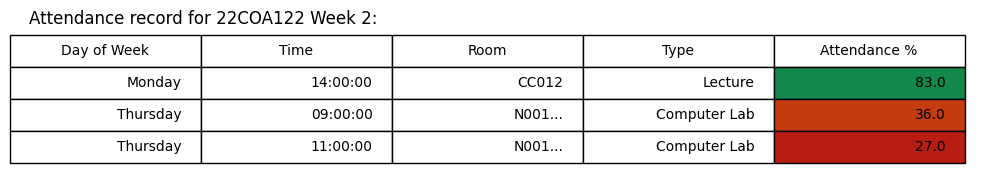

In [5]:
def moduleatt_testing_table():
    """
    Testing StudentAtt intial dataframe function 'merge_stuatt_compsess' that's used throughout the class.
    """
    module_att_table_test = module_att_table("22COA122",2) # module = 22COA122, week = 2
    module_att_table_test
    
    
moduleatt_testing_table()